In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

Pobranie danych i sprawdzenie podstawowych informacji

In [190]:
train_data = pd.read_csv("przygotowanie_train.csv")
train_data.head()

C:\Users\Laptop\AppData\Local\Temp\ipykernel_6492\2183454255.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("przygotowanie_train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [191]:
train_data.info() #sprawdzenie typu kolumn i gdzie występują nulle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Czyszczenie danych

In [192]:
#wydzielenie list kolumn numerycznych i kategorialnych
numeric_cols = ['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts',
                'Num_Credit_Card','Interest_Rate','Monthly_Balance',
                'Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment',
                'Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt',
               'Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly']
categorical_cols =['ID','Customer_ID','Month','Name','SSN','Occupation',
                   'Type_of_Loan','Credit_Mix','Credit_History_Age',
                   'Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']

In [193]:
#wydzielenie kolumn do zmiany typu
numeric_convert = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
                    'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
#sprawdzenie czy w danych numerycznych, które mają typ object, nie ma błędów
for feature in numeric_convert:
    uniques = train_data[feature].unique()
    print('Feature:','\n',feature, '\n', uniques,'\n','--'*40,'\n')

Feature: 
 Age 
 ['23' '-500' '28_' ... '4808_' '2263' '1342'] 
 -------------------------------------------------------------------------------- 

Feature: 
 Annual_Income 
 ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_'] 
 -------------------------------------------------------------------------------- 

Feature: 
 Num_of_Loan 
 ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'
 '95' '1353' '1228' '819' '1006' '795' '359' '1209' '590

Feature: 
 Outstanding_Debt 
 ['809.98' '605.03' '1303.01' ... '3571.7_' '3571.7' '502.38'] 
 -------------------------------------------------------------------------------- 

Feature: 
 Amount_invested_monthly 
 ['80.41529543900253' '118.28022162236736' '81.699521264648' ...
 '24.02847744864441' '251.67258219721603' '167.1638651610451'] 
 -------------------------------------------------------------------------------- 

Feature: 
 Monthly_Balance 
 ['312.49408867943663' '284.62916249607184' '331.2098628537912' ...
 516.8090832742814 319.1649785257098 393.6736955618808] 
 -------------------------------------------------------------------------------- 



In [194]:
#usunięcie zbędnych znaków '-', '_'
for feature in numeric_convert:
    train_data[feature] = train_data[feature].str.strip('-_')
#zastąpienie pustych kolumn NaN
for feature in numeric_convert:
    train_data[feature] = train_data[feature].replace({'':np.nan})

#zmiana typu zmiennych ilościowych
for feature in numeric_convert:
    train_data[feature] = train_data[feature].astype('float64')

In [195]:
for feature in numeric_convert:
    uniques = train_data[feature].unique()
    print('Feature:','\n',feature, '\n', uniques,'\n','--'*40,'\n')
#wszystkie kolumny ilościowe są teraz typu float i nie posiadają błędnych znaków

Feature: 
 Age 
 [  23.  500.   28. ... 4808. 2263. 1342.] 
 -------------------------------------------------------------------------------- 

Feature: 
 Annual_Income 
 [ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99] 
 -------------------------------------------------------------------------------- 

Feature: 
 Num_of_Loan 
 [4.000e+00 1.000e+00 3.000e+00 9.670e+02 1.000e+02 0.000e+00 2.000e+00
 7.000e+00 5.000e+00 6.000e+00 8.000e+00 9.000e+00 1.464e+03 6.220e+02
 3.520e+02 4.720e+02 1.017e+03 9.450e+02 1.460e+02 5.630e+02 3.410e+02
 4.440e+02 7.200e+02 1.485e+03 4.900e+01 7.370e+02 1.106e+03 4.660e+02
 7.280e+02 3.130e+02 8.430e+02 5.970e+02 6.170e+02 1.190e+02 6.630e+02
 6.400e+02 9.200e+01 1.019e+03 5.010e+02 1.302e+03 3.900e+01 7.160e+02
 8.480e+02 9.310e+02 1.214e+03 1.860e+02 4.240e+02 1.001e+03 1.110e+03
 1.152e+03 4.570e+02 1.433e+03 1.187e+03 5.200e+01 1.480e+03 1.047e+03
 1.035e+03 1.347e+03 3.300e+01 1.930e+02 6.990e+02 3.290e+02 1.451e+03
 4.840e+02 1.3

Feature: 
 Amount_invested_monthly 
 [ 80.41529544 118.28022162  81.69952126 ...  24.02847745 251.6725822
 167.16386516] 
 -------------------------------------------------------------------------------- 

Feature: 
 Monthly_Balance 
 [312.49408868 284.6291625  331.20986285 ... 448.42640653 343.7939996
 214.61493362] 
 -------------------------------------------------------------------------------- 



Usunięcie lub uzupełnienie pustych wartości

In [196]:
#sprawdzenie w których kolumnach są puste wartości i ile ich jest
train_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

In [261]:
data_clean = train_data.copy()
#usunięcie duplikatów według kolumny ID
data_clean.drop_duplicates(subset='ID',inplace=True)
#lista z kolumnami w których są puste wartości
cols_nulls = ['Name', 'Monthly_Inhand_Salary','Type_of_Loan',
              'Num_of_Delayed_Payment','Num_Credit_Inquiries','Credit_History_Age',
             'Amount_invested_monthly','Monthly_Balance']

#uzupełnienie pustych wartości średnią
data_clean['Monthly_Inhand_Salary'].fillna(method='pad',inplace=True)
data_clean['Monthly_Balance'].fillna(method='pad',inplace=True)
data_clean['Changed_Credit_Limit'].fillna(method='pad',inplace=True)
data_clean['Amount_invested_monthly'].fillna(method='pad',inplace=True)

#uzupełnienie pustych wartości gdy klient nie wziął żadnej pożyczki
data_clean.loc[(data_clean['Num_of_Loan']==0) & (data_clean['Type_of_Loan'].isnull()),'Type_of_Loan']='No Loan'

#uzupełnienie pustych wartości gdy klient nie prosił o kartę kredytową
data_clean.loc[(data_clean['Num_Credit_Inquiries']==0)&(data_clean['Credit_History_Age'].isnull()),'Credit_History_Age']='No credit'

#usunięcie kolumn nieistotnych dla tworzenia modelu
data_clean.drop(columns=['ID','Customer_ID','SSN','Name'],inplace=True)

#usunięcie wierszy z pustymi wartościami
data_clean.dropna(subset=['Num_of_Delayed_Payment','Num_Credit_Inquiries','Type_of_Loan','Credit_History_Age'],inplace=True)

data_clean.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

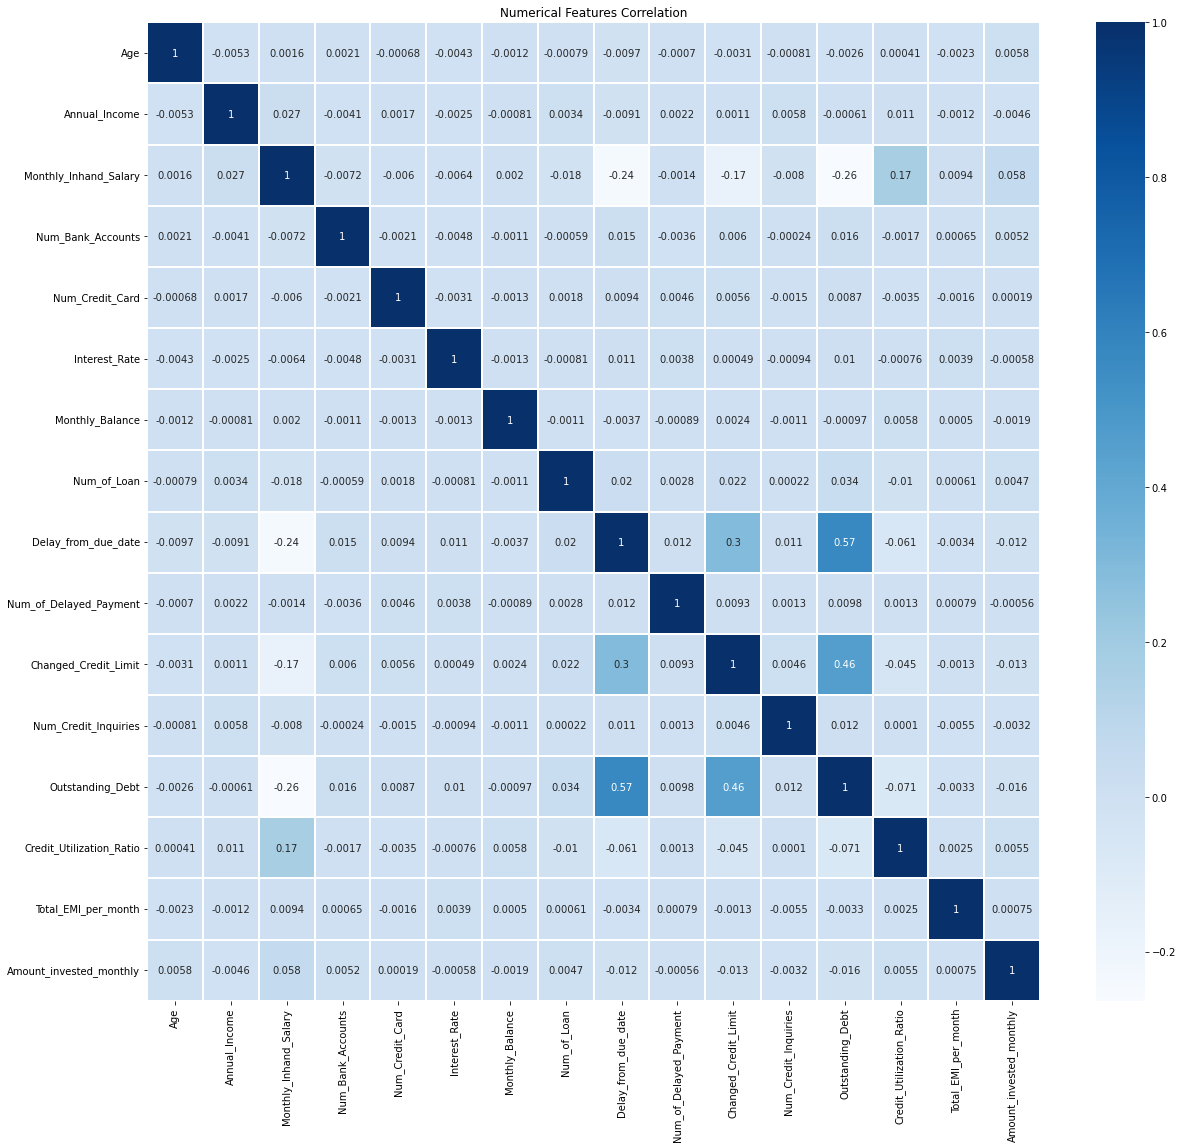

In [262]:
#korelacje cech numerycznych
plt.figure(figsize = (20,18))
sns.heatmap(data_clean[numeric_cols].corr(),annot=True,linewidths=0.1,cmap='Blues')
plt.title('Numerical Features Correlation')
plt.show() 
# Outstanding_Debt, Delay_from_due_date oraz Changed_Credit_Limit są ze sobą silnie skorelowane
# Monthly_Inhand_Salary oraz Credit_Utilization_Ratio są ze sobą średnio skorelowane

In [263]:
'''for column in numeric_cols:
    data_clean.hist(column=column)'''

'for column in numeric_cols:\n    data_clean.hist(column=column)'

In [264]:
#Usunięcie znacząco odstających danych, 
#zakresy dla których były usuwane dane zostały sprawdzone oddzielnie dla każdego atrybutu numerycznego
#z wykorzystaniem value_counts.sort_index() lub value_counts.sort_values()
data_clean.drop(data_clean.loc[data_clean['Age']>95].index,inplace=True)
data_clean.drop(data_clean.loc[data_clean['Num_Bank_Accounts']>11].index,inplace=True)
data_clean.drop(data_clean.loc[data_clean['Num_Bank_Accounts']<0].index,inplace=True)
data_clean.drop(data_clean.loc[data_clean['Num_Credit_Card']>11].index,inplace=True)
data_clean.drop(data_clean.loc[data_clean['Interest_Rate']>34].index,inplace=True)
data_clean.loc[data_clean['Num_of_Loan']==100].Num_of_loan = 10 #przy zamianie zmiennych na float 10 zamieniono na 100.00
data_clean.drop(data_clean.loc[data_clean['Num_of_Loan']>10].index,inplace=True)
data_clean.drop(data_clean.loc[data_clean['Num_of_Delayed_Payment']>28].index,inplace=True)
data_clean.drop(data_clean.loc[data_clean['Num_Credit_Inquiries']>17].index,inplace=True)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71564 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     71564 non-null  object 
 1   Age                       71564 non-null  float64
 2   Occupation                71564 non-null  object 
 3   Annual_Income             71564 non-null  float64
 4   Monthly_Inhand_Salary     71564 non-null  float64
 5   Num_Bank_Accounts         71564 non-null  int64  
 6   Num_Credit_Card           71564 non-null  int64  
 7   Interest_Rate             71564 non-null  int64  
 8   Num_of_Loan               71564 non-null  float64
 9   Type_of_Loan              71564 non-null  object 
 10  Delay_from_due_date       71564 non-null  int64  
 11  Num_of_Delayed_Payment    71564 non-null  float64
 12  Changed_Credit_Limit      71564 non-null  float64
 13  Num_Credit_Inquiries      71564 non-null  float64
 14  Credit

In [265]:
data_clean['Credit_History_Age'].value_counts()

No credit                 526
15 Years and 9 Months     351
19 Years and 5 Months     349
18 Years and 4 Months     348
19 Years and 9 Months     344
17 Years and 9 Months     344
15 Years and 10 Months    343
17 Years and 11 Months    343
15 Years and 11 Months    342
17 Years and 10 Months    340
19 Years and 4 Months     339
19 Years and 3 Months     335
18 Years and 3 Months     333
18 Years and 5 Months     332
18 Years and 2 Months     327
18 Years and 10 Months    326
17 Years and 8 Months     326
17 Years and 3 Months     325
17 Years and 5 Months     325
16 Years and 2 Months     322
19 Years and 10 Months    322
15 Years and 8 Months     321
18 Years and 11 Months    318
17 Years and 4 Months     311
17 Years and 2 Months     311
18 Years and 8 Months     311
16 Years and 3 Months     309
16 Years and 5 Months     308
19 Years and 8 Months     308
19 Years and 2 Months     306
16 Years and 9 Months     306
16 Years and 8 Months     304
17 Years and 7 Months     302
16 Years a

In [266]:
#zamiana atrybutu Credit History Age na liczbę miesięcy
def transform_history_age(v):
    if(v=='No credit'): return 0
    wynik =int(v[0:v.find('Years')-1])*12+int(v[v.find('d')+1:v.find('Months')-1])
    return wynik

data_clean['Credit_History_Age'] = data_clean['Credit_History_Age'].apply(transform_history_age)
numeric_cols.append('Credit_History_Age')
data_clean['Credit_History_Age'].value_counts()

0      526
189    351
233    349
220    348
237    344
213    344
190    343
215    343
191    342
214    340
232    339
231    335
219    333
221    332
218    327
226    326
212    326
207    325
209    325
194    322
238    322
188    321
227    318
208    311
206    311
224    311
195    309
197    308
236    308
230    306
201    306
200    304
211    302
202    301
239    301
203    300
196    298
225    297
216    292
193    290
192    289
217    287
234    282
228    282
205    279
187    278
240    275
229    275
242    274
222    270
210    267
235    267
243    265
223    265
204    260
199    259
185    257
245    246
198    244
241    239
244    239
184    232
186    230
166    224
165    220
77     217
161    215
394    213
75     212
363    212
71     211
362    211
368    210
183    210
76     210
117    209
383    209
358    209
152    208
164    208
359    207
365    206
314    206
167    206
149    205
347    204
74     204
160    204
281    203
81     202
285    202

In [268]:
scaler = MinMaxScaler()
for i in data_clean[numeric_cols]:
    data_clean[i]=scaler.fit_transform(data_clean[[i]])
data_clean.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,0.111111,Scientist,0.000501,0.102087,0.272727,0.363636,0.060606,0.444444,"Auto Loan, Credit-Builder Loan, Personal Loan,...",0.111111,0.250000,0.310554,0.235294,_,0.162020,0.227421,0.655941,No,0.000602,0.008042,High_spent_Small_value_payments,9.370889e-25,Good
3,April,0.111111,Scientist,0.000501,0.102087,0.272727,0.363636,0.060606,0.444444,"Auto Loan, Credit-Builder Loan, Personal Loan,...",0.138889,0.142857,0.172775,0.235294,Good,0.162020,0.379262,0.663366,No,0.000602,0.019946,Low_spent_Small_value_payments,6.699605e-25,Good
5,June,0.111111,Scientist,0.000501,0.102087,0.272727,0.363636,0.060606,0.444444,"Auto Loan, Credit-Builder Loan, Personal Loan,...",0.180556,0.142857,0.255442,0.235294,Good,0.162020,0.242075,0.668317,No,0.000602,0.006243,!@9#%8,1.021044e-24,Good
6,July,0.111111,Scientist,0.000501,0.102087,0.272727,0.363636,0.060606,0.444444,"Auto Loan, Credit-Builder Loan, Personal Loan,...",0.111111,0.285714,0.310554,0.235294,Good,0.162020,0.084586,0.670792,No,0.000602,0.017834,Low_spent_Small_value_payments,7.333025e-25,Good
8,January,0.172840,_______,0.001151,0.183501,0.181818,0.363636,0.151515,0.111111,Credit-Builder Loan,0.111111,0.142857,0.149352,0.117647,Good,0.121012,0.148801,0.789604,No,0.000229,0.010429,Low_spent_Small_value_payments,1.411678e-24,Standard


Transformacja danych kategorialnych

In [276]:
categorical_cols =['Month','Occupation','Type_of_Loan','Credit_Mix',
        'Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']

#data_clean['Payment_of_Min_Amount'].value_counts()


data_clean[categorical_cols] = data_clean[categorical_cols].apply(LabelEncoder().fit_transform)
    
data_clean.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3,0.111111,12,0.000501,0.102087,0.272727,0.363636,0.060606,0.444444,128,0.111111,0.250000,0.310554,0.235294,3,0.162020,0.227421,0.655941,1,0.000602,0.008042,3,9.370889e-25,0
3,0,0.111111,12,0.000501,0.102087,0.272727,0.363636,0.060606,0.444444,128,0.138889,0.142857,0.172775,0.235294,1,0.162020,0.379262,0.663366,1,0.000602,0.019946,6,6.699605e-25,0
5,5,0.111111,12,0.000501,0.102087,0.272727,0.363636,0.060606,0.444444,128,0.180556,0.142857,0.255442,0.235294,1,0.162020,0.242075,0.668317,1,0.000602,0.006243,0,1.021044e-24,0
6,4,0.111111,12,0.000501,0.102087,0.272727,0.363636,0.060606,0.444444,128,0.111111,0.285714,0.310554,0.235294,1,0.162020,0.084586,0.670792,1,0.000602,0.017834,6,7.333025e-25,0
8,3,0.172840,15,0.001151,0.183501,0.181818,0.363636,0.151515,0.111111,684,0.111111,0.142857,0.149352,0.117647,1,0.121012,0.148801,0.789604,1,0.000229,0.010429,6,1.411678e-24,2


Podzielenie zbioru na zbiór treningowy i testowy

In [284]:
x = data_clean.drop(['Credit_Score'],axis=1)
y = data_clean['Credit_Score']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
x_train.head(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
96033,2,0.308642,14,0.002280,0.312861,0.727273,0.363636,0.454545,0.222222,1406,0.180556,0.285714,0.532103,0.411765,2,0.232550,0.170436,0.324257,2,0.000875,0.041192,6,9.074489e-25
16633,2,0.370370,3,0.002346,0.321414,0.727273,0.272727,0.000000,0.111111,2778,0.305556,0.464286,0.136126,0.000000,1,0.190154,0.223863,0.925743,1,0.000612,0.029656,4,1.296647e-24
4542,4,0.345679,12,0.000295,0.060604,0.636364,0.818182,0.454545,0.666667,478,0.347222,0.678571,0.135850,1.000000,0,0.507609,0.110120,0.349010,2,0.000578,0.013666,6,6.788307e-25
57134,4,0.185185,10,0.000345,0.058820,0.818182,0.636364,0.636364,1.000000,5993,0.597222,0.892857,0.746211,0.823529,0,0.597852,0.370198,0.363861,2,0.001317,0.006091,4,6.555290e-25
59405,5,0.456790,0,0.001234,0.198862,0.545455,0.272727,0.545455,0.333333,851,0.180556,0.571429,0.296776,0.000000,2,0.084002,0.405431,0.772277,2,0.000638,0.003433,1,1.439118e-24
30186,6,0.444444,8,0.001559,0.224820,0.272727,0.090909,0.303030,0.000000,3462,0.069444,0.142857,0.318269,0.235294,1,0.070472,0.495016,0.611386,1,0.000000,0.009169,1,1.540631e-24
80362,6,0.222222,7,0.004672,0.634843,0.272727,0.363636,0.272727,0.111111,5591,0.319444,0.714286,0.329016,0.000000,2,0.189090,0.446981,0.809406,2,0.000815,0.007999,1,3.207424e-24
45080,3,0.296296,5,0.000520,0.073959,0.454545,0.636364,0.606061,0.444444,2729,0.222222,0.607143,0.243042,0.411765,2,0.478439,0.210959,0.373762,2,0.000492,0.006733,3,8.778396e-25
36376,3,0.209877,2,0.000336,0.057928,0.636364,0.818182,0.818182,1.000000,263,0.930556,0.535714,0.240562,0.470588,0,0.360468,0.450607,0.500000,2,0.000856,0.000000,1,8.309417e-25
85260,7,0.172840,11,0.002338,0.353204,0.272727,0.272727,0.181818,0.111111,684,0.458333,0.535714,0.214109,0.235294,2,0.080305,0.227177,0.554455,1,0.000457,0.025989,4,1.587189e-24
